# importing


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset1 = pd.read_csv("D:/recess work/2018CrimeStatisticsByCategoryOfCrime.csv")
df2 = pd.read_csv("D:/recess work/MPsProfileInformation10thParliament.csv", encoding="ISO-8859-1")
df3 = pd.read_csv("D:/recess work/UceResultsBySchool2011-2016.csv")

In [3]:
dataset1.head()

,Unnamed: 0,Unnamed: 1,REPORTED CASES,Unnamed: 3,Unnamed: 4,Unnamed: 5,PERFOMANCE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
1,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,...,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
2,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,...,18,19,20,21,NaN,NaN,NaN,22,23,24
3,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,Death (by shooting),190,117,29,44,74,3,1,1,...,-,-,-,-,197,4,17,-,"11,500,000",-


# cleaning the dataset

In [4]:
dataset1 = dataset1.drop(0, axis = 0)

In [5]:
#The first two columns in the dataset have null values because there column labels are shifted below
#fix this by shifting these 2 column values back up

dataset1[["Unnamed: 0", "Unnamed: 1"]] = dataset1[["Unnamed: 0", "Unnamed: 1"]].shift(-1)
dataset1.head()

,Unnamed: 0,Unnamed: 1,REPORTED CASES,Unnamed: 3,Unnamed: 4,Unnamed: 5,PERFOMANCE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
1,S/No.,CASE/CRIME INCIDENCES,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,...,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
2,NaN,HOMICIDES,1,2,3,4,5,6,7,8,...,18,19,20,21,NaN,NaN,NaN,22,23,24
3,1,Death (by shooting),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Death (by mob action),190,117,29,44,74,3,1,1,...,-,-,-,-,197,4,17,-,"11,500,000",-
5,3,Death (Poisoning),636,431,109,96,176,2,-,1,...,-,-,-,-,619,11,25,1,-,-


# actual data columns are aligned

In [6]:
#Now the actual data columns are aligned at row 1, 
#we have to create a new dataframe with the row 1 values as the column headings

dataset1_values = dataset1.iloc[2:]
new_Columns = dataset1.iloc[0].values

In [7]:
new_Columns

array(['S/No.', 'CASE/CRIME INCIDENCES', 'Totals Cases',
       'Cases under Inquiry', 'Not Detected/NPW', 'Cases taken to court',
       'Cases submitted toDPP/RSA', 'Cases with convictions',
       'Cases with Acquittals', 'Cases Dismissed',
       'Cases pending in Court', 'Male Adult', 'Male Juven.',
       'Female Adult', 'Female Juven.', 'Male Adult', 'Male Juven.',
       'Female Adult', 'Female Juven.', 'Acquitted', 'Discharged',
       'Awaiting Trial', 'Male Adult', 'Male Juven.', 'Female Adult',
       'Female Juven.', 'Death', 'Fined', 'Probation Bound Over',
       'CAUTION', 'COMM. WORK', 'Fines  Awarded (UgShs.)', 'Male Adult',
       'Male Juven.', 'Female Adult', 'Female Juven.', 'Lost',
       'Recovered'], dtype=object)

In [8]:
dataset1_values.head()

,Unnamed: 0,Unnamed: 1,REPORTED CASES,Unnamed: 3,Unnamed: 4,Unnamed: 5,PERFOMANCE,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
3,1,Death (by shooting),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Death (by mob action),190,117,29,44,74,3,1,1,...,-,-,-,-,197,4,17,-,"11,500,000",-
5,3,Death (Poisoning),636,431,109,96,176,2,-,1,...,-,-,-,-,619,11,25,1,-,-
6,4,Death (Aggravated Domestic Violence),81,54,12,15,17,-,-,-,...,-,-,-,-,65,9,14,4,-,-
7,5,Death(Fire Out Breaks),362,107,24,231,239,15,-,2,...,-,-,-,-,174,25,138,16,-,-


In [9]:
#now create a new dataframe with those 2 values
new_dataset1 = pd.DataFrame(dataset1_values.values, columns=new_Columns)
new_dataset1.head()

,S/No.,CASE/CRIME INCIDENCES,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,...,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
0,1,Death (by shooting),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Death (by mob action),190,117,29,44,74,3,1,1,...,-,-,-,-,197,4,17,-,"11,500,000",-
2,3,Death (Poisoning),636,431,109,96,176,2,-,1,...,-,-,-,-,619,11,25,1,-,-
3,4,Death (Aggravated Domestic Violence),81,54,12,15,17,-,-,-,...,-,-,-,-,65,9,14,4,-,-
4,5,Death(Fire Out Breaks),362,107,24,231,239,15,-,2,...,-,-,-,-,174,25,138,16,-,-


In [10]:
new_dataset1.fillna(0, inplace = True)

In [11]:
new_dataset1.head()

,S/No.,CASE/CRIME INCIDENCES,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,...,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
0,1,Death (by shooting),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Death (by mob action),190,117,29,44,74,3,1,1,...,-,-,-,-,197,4,17,-,"11,500,000",-
2,3,Death (Poisoning),636,431,109,96,176,2,-,1,...,-,-,-,-,619,11,25,1,-,-
3,4,Death (Aggravated Domestic Violence),81,54,12,15,17,-,-,-,...,-,-,-,-,65,9,14,4,-,-
4,5,Death(Fire Out Breaks),362,107,24,231,239,15,-,2,...,-,-,-,-,174,25,138,16,-,-


## Correlation Matrix

In [12]:
import re

def remove_invalid_chars(text):
    text = str(text)
    text = re.sub("[-,]","",text)
    return text

remove_invalid_chars("2,000")

'2000'

In [13]:
#remove all characters in integer columns so as to allow casting from object to integer
for column in new_dataset1:
    try:
        new_dataset1[column] = new_dataset1[column].map(remove_invalid_chars)

    except Exception:
        new_dataset1[column] = new_dataset1[column].applymap(remove_invalid_chars)

In [14]:
#convert all the columns to numeric
for column in new_dataset1:
    try:
        new_dataset1[column] = pd.to_numeric(new_dataset1[column])

    except Exception as e:
        print(column)
        continue

CASE/CRIME INCIDENCES
Male Adult
Male Juven.
Female Adult
Female Juven.
Male Adult
Male Juven.
Female Adult
Female Juven.
Male Adult
Male Juven.
Female Adult
Female Juven.
Male Adult
Male Juven.
Female Adult
Female Juven.


In [15]:
corr = new_dataset1.corr()

corr

C:\Users\DEX ASUS\AppData\Local\Temp\ipykernel_5048\2064010647.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = new_dataset1.corr()


,S/No.,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,...,Discharged,Awaiting Trial,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Lost,Recovered
S/No.,1.000000,-0.217321,-0.217464,-0.213170,-0.216926,-0.215110,-0.235233,-0.245205,-0.236653,-0.219725,...,-0.237924,-0.217455,NaN,-0.189277,-0.346878,-0.261936,-0.274263,-0.178531,-0.246825,-0.263785
Totals Cases,-0.217321,1.000000,0.998767,0.994950,0.990124,0.993989,0.982165,0.993480,0.979935,0.990967,...,0.981259,0.991781,NaN,0.886916,0.933260,0.985928,0.984302,0.862124,0.849345,0.883351
Cases under Inquiry,-0.217464,0.998767,1.000000,0.995857,0.983677,0.989163,0.972980,0.988395,0.970448,0.986965,...,0.972156,0.988145,NaN,0.883439,0.927527,0.982399,0.978149,0.859195,0.854102,0.881925
Not Detected/NPW,-0.213170,0.994950,0.995857,1.000000,0.972090,0.978521,0.963578,0.982273,0.959729,0.973674,...,0.961613,0.975605,NaN,0.872013,0.923857,0.977293,0.974232,0.842695,0.833371,0.863011
Cases taken to court,-0.216926,0.990124,0.983677,0.972090,1.000000,0.999228,0.996015,0.994192,0.995807,0.997082,...,0.996075,0.996295,NaN,0.891162,0.932603,0.982296,0.985287,0.870866,0.849810,0.896496
Cases submitted toDPP/RSA,-0.215110,0.993989,0.989163,0.978521,0.999228,1.000000,0.993508,0.995163,0.992922,0.997897,...,0.993398,0.997499,NaN,0.891410,0.933257,0.985249,0.985921,0.870500,0.855745,0.896475
Cases with convictions,-0.235233,0.982165,0.972980,0.963578,0.996015,0.993508,1.000000,0.992469,0.997870,0.986441,...,0.997940,0.986339,NaN,0.894399,0.936790,0.979293,0.987528,0.872822,0.845208,0.899834
Cases with Acquittals,-0.245205,0.993480,0.988395,0.982273,0.994192,0.995163,0.992469,1.000000,0.992182,0.988729,...,0.992653,0.989696,NaN,0.883476,0.934718,0.984303,0.988981,0.861165,0.845112,0.882120
Cases Dismissed,-0.236653,0.979935,0.970448,0.959729,0.995807,0.992922,0.997870,0.992182,1.000000,0.986652,...,0.999368,0.985781,NaN,0.877616,0.922643,0.971903,0.982399,0.860306,0.851146,0.901111
Cases pending in Court,-0.219725,0.990967,0.986965,0.973674,0.997082,0.997897,0.986441,0.988729,0.986652,1.000000,...,0.987321,0.998776,NaN,0.887151,0.927256,0.980602,0.977842,0.868361,0.848289,0.887473


# ploting

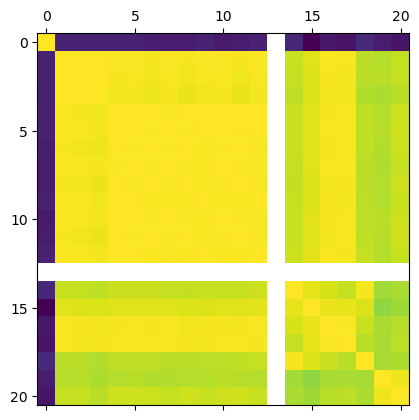

In [16]:
plt.matshow(corr)

C:\Users\DEX ASUS\AppData\Local\Temp\ipykernel_5048\2804262352.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  new_dataset1.hist(ax = ax)


array([[<Axes: title={'center': 'S/No.'}>,
        <Axes: title={'center': 'Totals Cases'}>,
        <Axes: title={'center': 'Cases under Inquiry'}>,
        <Axes: title={'center': 'Not Detected/NPW'}>,
        <Axes: title={'center': 'Cases taken to court'}>],
       [<Axes: title={'center': 'Cases submitted toDPP/RSA'}>,
        <Axes: title={'center': 'Cases with convictions'}>,
        <Axes: title={'center': 'Cases with Acquittals'}>,
        <Axes: title={'center': 'Cases Dismissed'}>,
        <Axes: title={'center': 'Cases pending in Court'}>],
       [<Axes: title={'center': 'Acquitted'}>,
        <Axes: title={'center': 'Discharged'}>,
        <Axes: title={'center': 'Awaiting Trial'}>,
        <Axes: title={'center': 'Death'}>,
        <Axes: title={'center': 'Fined'}>],
       [<Axes: title={'center': 'Probation Bound Over'}>,
        <Axes: title={'center': 'CAUTION'}>,
        <Axes: title={'center': 'COMM. WORK'}>,
        <Axes: title={'center': 'Fines  Awarded (UgShs.)

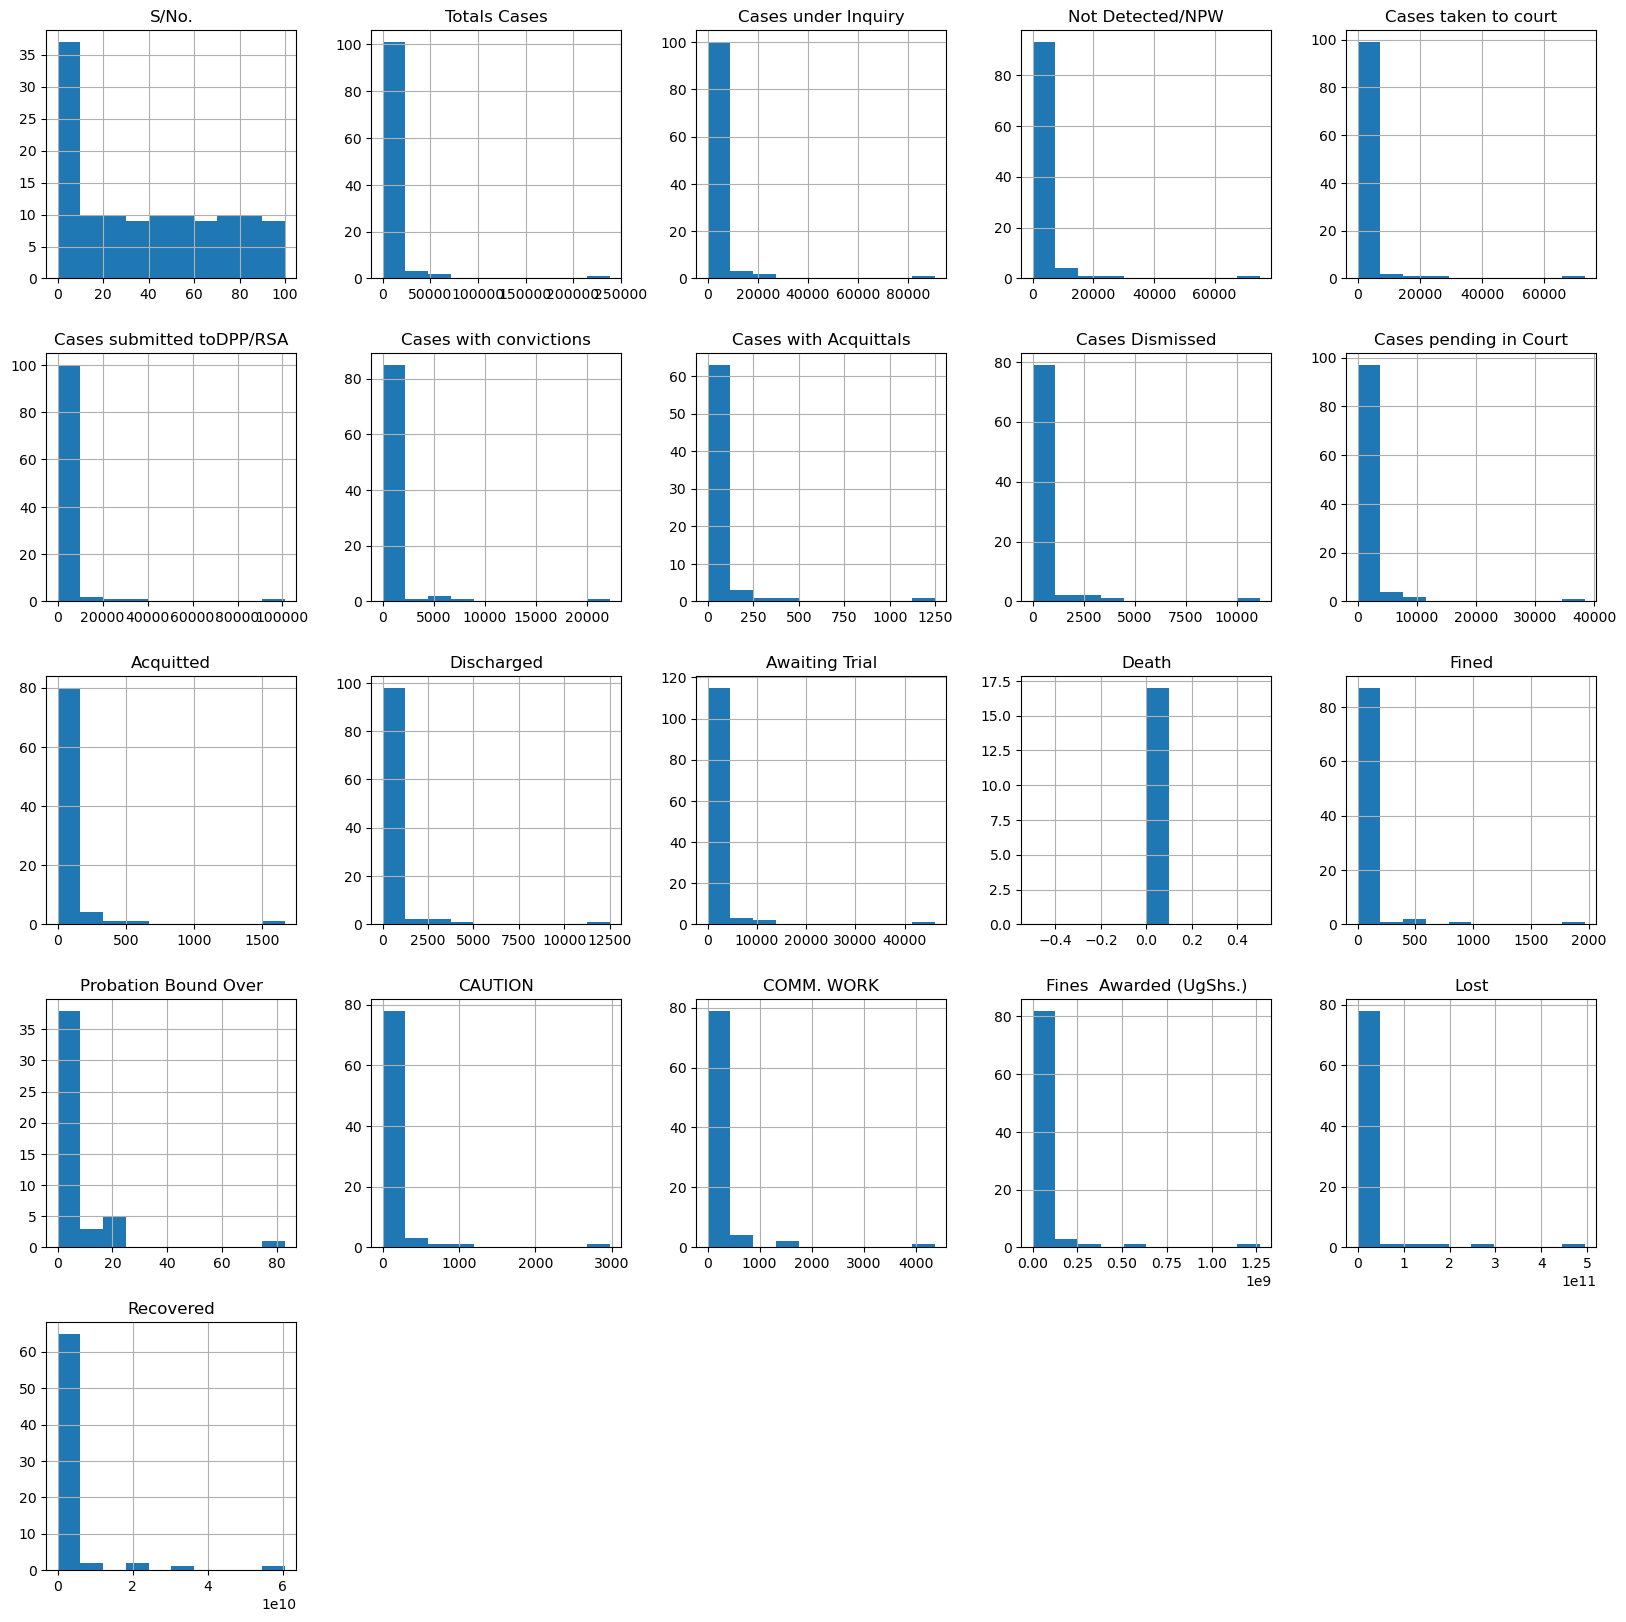

In [17]:
fig = plt.figure(figsize=(20,20))
ax = fig.gca()
new_dataset1.hist(ax = ax)

In [28]:
import numpy as np
import seaborn as sns

In [29]:
# anajyszing df2

df2.head()

,No.,Name of M.P,District,Constituency,Political Party,Profession,Marital status,Phone number,Date of Birth,U.C.E School,...,Past Job_1,Past Job_2,Past Job_3,Past Job_4,Hobbies,Special Interests,Committee_1,Role on Committee 1,Committee_2,Role on Committee 2
0,1,Aadroa Alex Onzima,None,Ex-Officio,None,Administrator,Married,+256772411334/+256794336266,06-24-1952,Mbarara High School,...,"Minister of State - Vice Presidents Office, Go...","Minister of State for Local Government, Govern...","Member of Parliament, Parliament of Uganda, 19...","Patron, Brethren Micro-Credit (Sacco), 2013 to...",Lay interpretation of Holy Roman Catholic scri...,Helping the Poor,COMMITTEE ON NATIONAL ECONOMY,Member,COMMITTEE ON AGRICULTURE,Member
1,2,Ababiku Jesca,Adjumani,District Woman Representative,NRM,Teacher,Single,772315541,07/17/1975,Metu Secondary School,...,"Member of Parliament, Parliament of Uganda, 20...","District Councilor, Wakiso, 2002-2010","Secretary for Production, Adjumani District lo...","Council Member, Kyambogo University, 2004-2010","Debating, Current Affairs, Listening to music,...","Advocay, Lobbying, Working with community grou...",PUBLIC ACCOUNTS COMMITTEE,Member,COMMITTEE ON PRESIDENTIAL AFFAIRS,Member
2,3,ABACANON CHARLES ANGIRO GUTOMOI,Lira,ERUTE COUNTY NORTH,FDC,Farmer,Married,392944775,05-17-1949,East African Examination Council,...,"Member of Parliament, Parliament of Uganda, 20...","L.C.5 Representative, Lira District Local Gove...","Headteacher, Aromo Vocational Sec School, 1988...","Secretary Uganda National Farmers Ass, Lira Di...","Music, dance, Drama, Singing, Hunting",Conflicts management,Committee on Science and Technology,Member,COMMITTEE ON AGRICULTURE,Member
3,4,ABALA DAVID,Ngora,Ngora County,NRM,Administrator,Married,"0772408242, 0702888820",10/3/75,Mbarara High School,...,"Lecturer, Kumi University, 2005-2016","Faculty Dean, Kumi University, 2008-2016","Staff Representative, Kumi University Council,...","Education Officer, Vision Terudo, 1999-2001",Playing Football,"Preaching, Mobilisation","COMMITTEE ON COMMISSIONS, STATE AUTHORITIES & ...",Member,COMMITTEE ON FOREIGN AFFAIRS,Member
4,5,ABBAS AGABA MUGISHA,Kamwenge,Kitagwenda County,NRM,Lawyer/Advocate,Married,772628660,10/13/1979,Kibuli Secondary School,...,"RDC Butaleja, Office of the President, 2014-2015","RDC- Serere, Office of the President, 2012-2014","Member, National Council of Higher Education, ...","Member, African Peer Review Mechanism Governin...","Volley ball, Hand ball, Academic Writing, Rese...","Poverty Eradication, Health Promotion, Uplifti...","COMMITTEE ON RULES, PRIVILEGES AND DISCIPLINE",Vice Chairperson,COMMITTEE ON LEGAL AND PARLIAMENTARY AFFAIRS,Member


In [19]:
df2.shape

(439, 87)

In [20]:
for column in df2:
    print(column, df2[column].isnull().sum())

No. 0
Name of M.P 0
District 0
Constituency 0
Political Party 0
Profession 1
Marital status 3
Phone number 6
Date of Birth 7
P.L.E School 287
P.L.E Year 259
U.C.E School 157
U.C.E Year 107
U.A.C.E School 184
U.A.C.E Year 136
First Degree 82
University of First Degree 54
Year of first Degree 60
Second Degree 257
University of Second Degree 251
Year of second degree 254
Third Degree 396
University of Third Degree 398
Year of Third Degree 398
Other Qualifications 146
Past Job_1 8
Past Job_2 35
Past Job_3 73
Past Job_4 149
Past Job_5 219
Past Job_6 274
Past Job_7 318
Past Job_8 355
Past Job_9 390
Past Job_10 415
Hobbies 66
Special Interests 189
Other Information 392
Professional Body Membership 297
Committee_1 105
Role on Committee 1 105
Committee_2 170
Role on Committee 2 171
Committee_3 400
Role on Committee 3 401
Committee_4 437
Role on Committee 4 437
Unnamed: 47 438
Unnamed: 48 438
Unnamed: 49 438
Unnamed: 50 438
Unnamed: 51 438
Unnamed: 52 438
Unnamed: 53 438
Unnamed: 54 438
Unnamed:

In [21]:
#dropping all columns with 200+ null values
for column in df2:
    count = df2[column].isnull().sum()

    if count > 200:
        df2 = df2.drop(column, axis = 1)

In [22]:
df2.head(n=3)

,No.,Name of M.P,District,Constituency,Political Party,Profession,Marital status,Phone number,Date of Birth,U.C.E School,...,Past Job_1,Past Job_2,Past Job_3,Past Job_4,Hobbies,Special Interests,Committee_1,Role on Committee 1,Committee_2,Role on Committee 2
0,1,Aadroa Alex Onzima,None,Ex-Officio,None,Administrator,Married,+256772411334/+256794336266,06-24-1952,NaN,...,"Minister of State - Vice Presidents Office, Go...","Minister of State for Local Government, Govern...","Member of Parliament, Parliament of Uganda, 19...","Patron, Brethren Micro-Credit (Sacco), 2013 to...",Lay interpretation of Holy Roman Catholic scri...,NaN,NaN,NaN,NaN,NaN
1,2,Ababiku Jesca,Adjumani,District Woman Representative,NRM,Teacher,Single,772315541,07/17/1975,Metu Secondary School,...,"Member of Parliament, Parliament of Uganda, 20...","District Councilor, Wakiso, 2002-2010","Secretary for Production, Adjumani District lo...","Council Member, Kyambogo University, 2004-2010","Debating, Current Affairs, Listening to music,...","Advocay, Lobbying, Working with community grou...",PUBLIC ACCOUNTS COMMITTEE,Member,COMMITTEE ON PRESIDENTIAL AFFAIRS,Member
2,3,ABACANON CHARLES ANGIRO GUTOMOI,Lira,ERUTE COUNTY NORTH,FDC,Farmer,Married,392944775,05-17-1949,East African Examination Council,...,"Member of Parliament, Parliament of Uganda, 20...","L.C.5 Representative, Lira District Local Gove...","Headteacher, Aromo Vocational Sec School, 1988...","Secretary Uganda National Farmers Ass, Lira Di...","Music, dance, Drama, Singing, Hunting",Conflicts management,Committee on Science and Technology,Member,NaN,NaN


In [23]:
for column in df2:
    df2[column].fillna(df2[column].mode()[0], inplace = True) #replace null values with the most frequent values

In [24]:
df2.head()

,No.,Name of M.P,District,Constituency,Political Party,Profession,Marital status,Phone number,Date of Birth,U.C.E School,...,Past Job_1,Past Job_2,Past Job_3,Past Job_4,Hobbies,Special Interests,Committee_1,Role on Committee 1,Committee_2,Role on Committee 2
0,1,Aadroa Alex Onzima,None,Ex-Officio,None,Administrator,Married,+256772411334/+256794336266,06-24-1952,Mbarara High School,...,"Minister of State - Vice Presidents Office, Go...","Minister of State for Local Government, Govern...","Member of Parliament, Parliament of Uganda, 19...","Patron, Brethren Micro-Credit (Sacco), 2013 to...",Lay interpretation of Holy Roman Catholic scri...,Helping the Poor,COMMITTEE ON NATIONAL ECONOMY,Member,COMMITTEE ON AGRICULTURE,Member
1,2,Ababiku Jesca,Adjumani,District Woman Representative,NRM,Teacher,Single,772315541,07/17/1975,Metu Secondary School,...,"Member of Parliament, Parliament of Uganda, 20...","District Councilor, Wakiso, 2002-2010","Secretary for Production, Adjumani District lo...","Council Member, Kyambogo University, 2004-2010","Debating, Current Affairs, Listening to music,...","Advocay, Lobbying, Working with community grou...",PUBLIC ACCOUNTS COMMITTEE,Member,COMMITTEE ON PRESIDENTIAL AFFAIRS,Member
2,3,ABACANON CHARLES ANGIRO GUTOMOI,Lira,ERUTE COUNTY NORTH,FDC,Farmer,Married,392944775,05-17-1949,East African Examination Council,...,"Member of Parliament, Parliament of Uganda, 20...","L.C.5 Representative, Lira District Local Gove...","Headteacher, Aromo Vocational Sec School, 1988...","Secretary Uganda National Farmers Ass, Lira Di...","Music, dance, Drama, Singing, Hunting",Conflicts management,Committee on Science and Technology,Member,COMMITTEE ON AGRICULTURE,Member
3,4,ABALA DAVID,Ngora,Ngora County,NRM,Administrator,Married,"0772408242, 0702888820",10/3/75,Mbarara High School,...,"Lecturer, Kumi University, 2005-2016","Faculty Dean, Kumi University, 2008-2016","Staff Representative, Kumi University Council,...","Education Officer, Vision Terudo, 1999-2001",Playing Football,"Preaching, Mobilisation","COMMITTEE ON COMMISSIONS, STATE AUTHORITIES & ...",Member,COMMITTEE ON FOREIGN AFFAIRS,Member
4,5,ABBAS AGABA MUGISHA,Kamwenge,Kitagwenda County,NRM,Lawyer/Advocate,Married,772628660,10/13/1979,Kibuli Secondary School,...,"RDC Butaleja, Office of the President, 2014-2015","RDC- Serere, Office of the President, 2012-2014","Member, National Council of Higher Education, ...","Member, African Peer Review Mechanism Governin...","Volley ball, Hand ball, Academic Writing, Rese...","Poverty Eradication, Health Promotion, Uplifti...","COMMITTEE ON RULES, PRIVILEGES AND DISCIPLINE",Vice Chairperson,COMMITTEE ON LEGAL AND PARLIAMENTARY AFFAIRS,Member


In [25]:
#convert all the numerical columns to integer
for column in df2:
    try:
        df2[column] = pd.to_numeric(df2[column])
        print(column)

    except Exception:
        #can't be convered to numeric
        pass

No.


In [26]:
#only one numeric column
print(df2.columns)

Index(['No.', 'Name of M.P', 'District', 'Constituency', 'Political Party',
       'Profession', 'Marital status', 'Phone number', 'Date of Birth',
       'U.C.E School', 'U.C.E Year', 'U.A.C.E School', 'U.A.C.E Year',
       'First Degree', 'University of First Degree', 'Year of first Degree',
       'Other Qualifications', 'Past Job_1', 'Past Job_2', 'Past Job_3',
       'Past Job_4', 'Hobbies', 'Special Interests', 'Committee_1',
       'Role on Committee 1', 'Committee_2', 'Role on Committee 2'],
      dtype='object')


In [31]:
corr = df2.corr()

corr

C:\Users\DEX ASUS\AppData\Local\Temp\ipykernel_5048\2039677585.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


,No.
No.,1.0


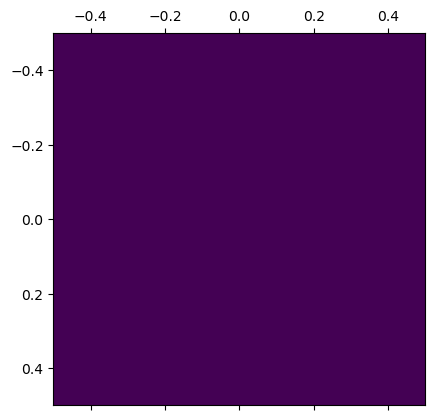

In [32]:
plt.matshow(corr)
